In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2000-01-01'
end = '2024-06-30'
stock = 'TSLA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3469,2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
3470,2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600
3471,2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300
3472,2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,96843300


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3469,2024-04-11,172.550003,175.880005,168.509995,174.600006,174.600006,94516000
3470,2024-04-12,172.339996,173.809998,170.360001,171.050003,171.050003,64506600
3471,2024-04-15,170.240005,170.690002,161.380005,161.479996,161.479996,100245300
3472,2024-04-16,156.740005,158.190002,153.750000,157.110001,157.110001,96843300
3473,2024-04-17,157.619995,157.710007,153.779999,155.660004,155.660004,41639121


In [7]:
ma_100_days = data.Close.rolling(100).mean()

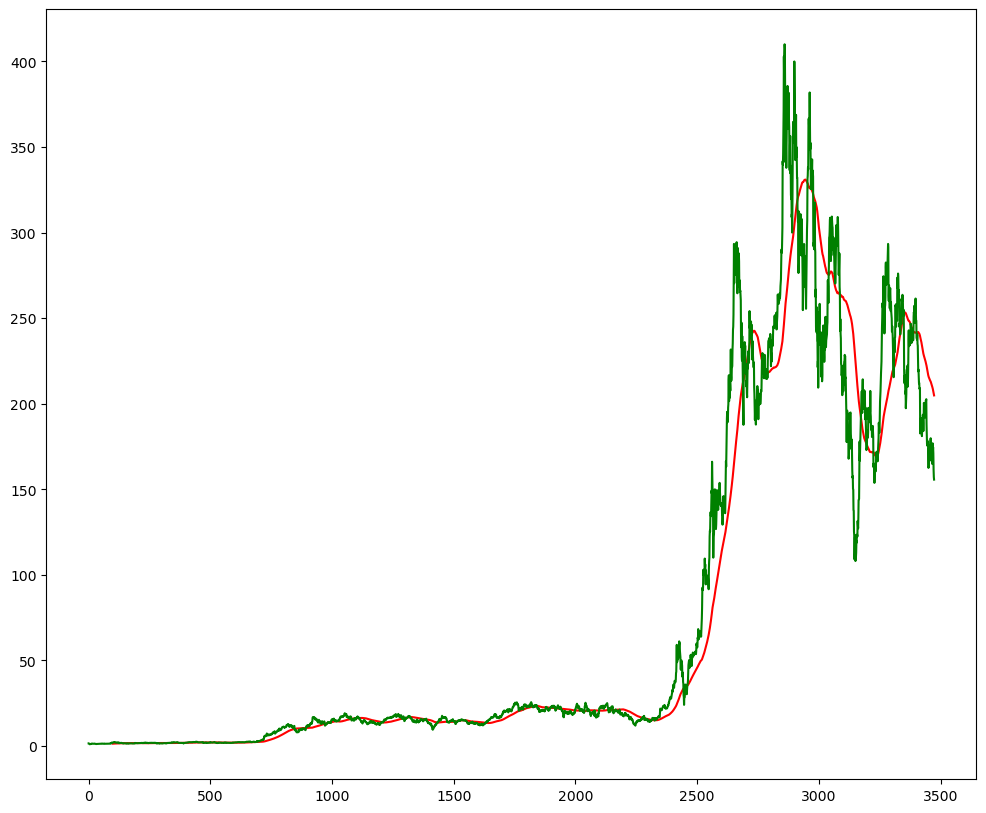

In [8]:
plt.figure(figsize = (12,10))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')

In [9]:
ma_200_days = data.Close.rolling(200).mean()

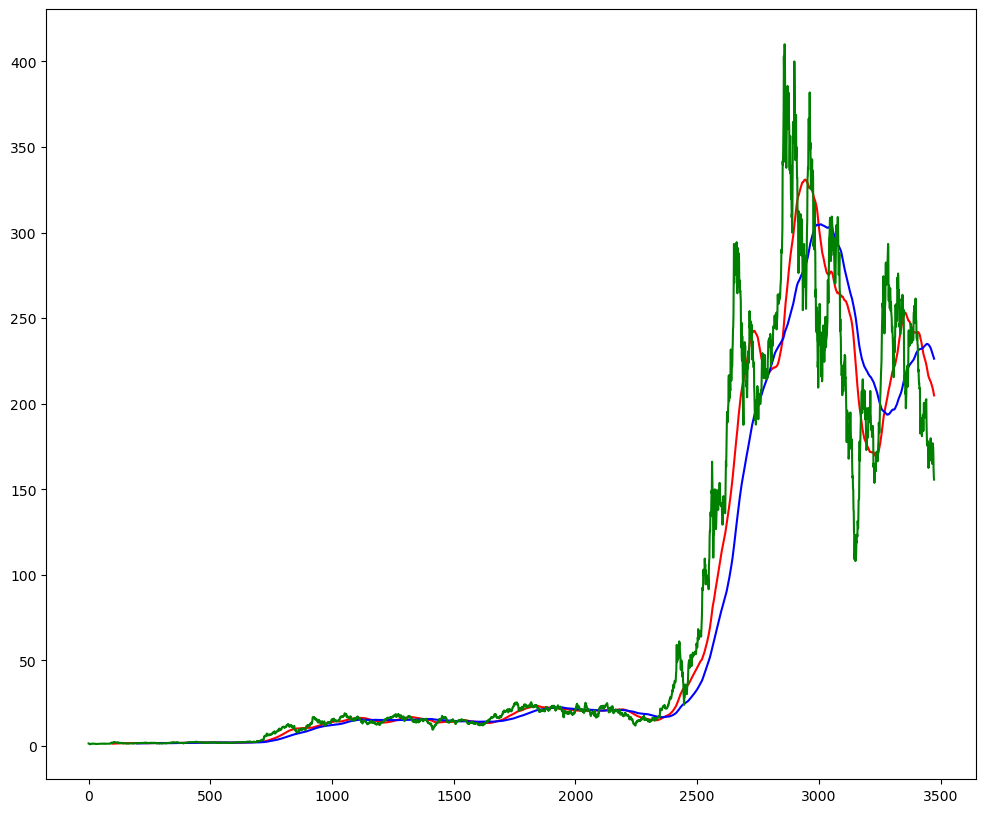

In [10]:
plt.figure(figsize=(12,10))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')


In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2779

In [14]:
data_test.shape[0]

695

In [15]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
data_train

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000
...,...
2774,214.883331
2775,217.603333
2776,218.983337
2777,228.566666


In [34]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [19]:
!pip install tensorflow


In [20]:
pip install -U tensorflow[and-cuda]

  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.3.101-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvcc_cu12-12.3.107-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.3.107-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.3.101-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cudnn_cu12-8.9.7.29-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu12-11.0.12.1-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.4.107-py3-none-win_amd64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.5.4.101-py3-none-win_amd64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.2.0.103-py3-none-win_am

In [43]:
x, y = np.array(x), np.array(y)

In [44]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(units = 1))
                             

In [46]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [47]:
model.save

<bound method Model.save of <keras.src.engine.sequential.Sequential object at 0x000002679C2A5C10>>

In [48]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
84/84 [==============================] - 63s 698ms/step - loss: 0.0156
Epoch 2/50
84/84 [==============================] - 61s 730ms/step - loss: 0.0041
Epoch 3/50
84/84 [==============================] - 56s 670ms/step - loss: 0.0035
Epoch 4/50
84/84 [==============================] - 56s 666ms/step - loss: 0.0034
Epoch 5/50
84/84 [==============================] - 57s 679ms/step - loss: 0.0027
Epoch 6/50
84/84 [==============================] - 56s 665ms/step - loss: 0.0031
Epoch 7/50
84/84 [==============================] - 56s 664ms/step - loss: 0.0034
Epoch 8/50
84/84 [==============================] - 56s 665ms/step - loss: 0.0027
Epoch 9/50
84/84 [==============================] - 56s 664ms/step - loss: 0.0022
Epoch 10/50
84/84 [==============================] - 56s 666ms/step - loss: 0.0025
Epoch 11/50
84/84 [==============================] - 56s 665ms/step - loss: 0.0022
Epoch 12/50
84/84 [==============================] - 56s 664ms/step - loss: 0.0030
Epoch 13/50
8

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 60)           14880     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 100)          72400     
                                                                 
 dropout_11 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_12 (LSTM)              (None, 120)              

In [51]:
past_100_days = data_train.tail(100)

In [52]:
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [53]:
data_test_scale = scaler.fit_transform(data_test)

In [54]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [55]:
y_predict = model.predict(x)

25/25 [==============================] - 3s 118ms/step


In [56]:
y_predict

array([[0.38431206],
       [0.38588578],
       [0.3883324 ],
       [0.39143646],
       [0.3951923 ],
       [0.39905846],
       [0.40247956],
       [0.40541708],
       [0.4077348 ],
       [0.40911525],
       [0.40917462],
       [0.40764716],
       [0.40446848],
       [0.4002964 ],
       [0.39584595],
       [0.39187816],
       [0.3888845 ],
       [0.387174  ],
       [0.38659734],
       [0.3870466 ],
       [0.3880086 ],
       [0.3890149 ],
       [0.3898583 ],
       [0.3904189 ],
       [0.39046374],
       [0.3899261 ],
       [0.38871711],
       [0.38680845],
       [0.3844105 ],
       [0.38196486],
       [0.3798166 ],
       [0.37835175],
       [0.37779766],
       [0.37805945],
       [0.37901306],
       [0.38045686],
       [0.3823703 ],
       [0.38520175],
       [0.389022  ],
       [0.3937251 ],
       [0.39910227],
       [0.40462974],
       [0.4098549 ],
       [0.4147117 ],
       [0.41899204],
       [0.4226355 ],
       [0.4257343 ],
       [0.428

In [57]:
scale = 1/scaler.scale_

In [58]:
y_predict = y_predict*scale

In [59]:
y = y*scale

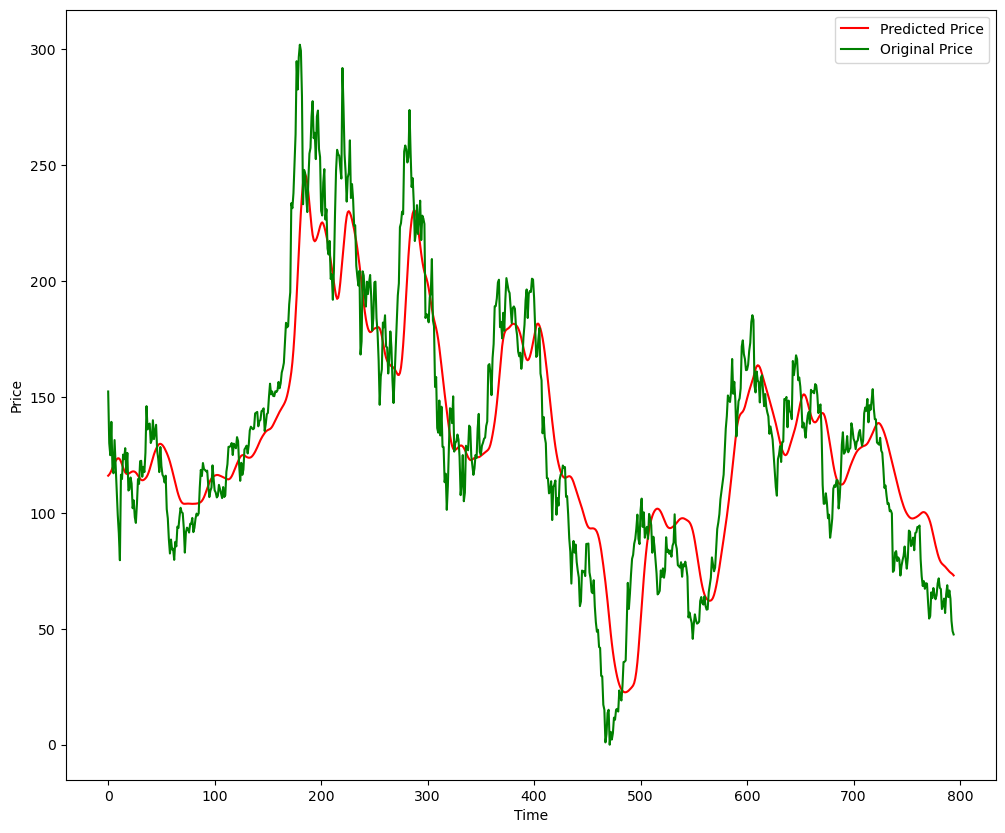

In [60]:
plt.figure(figsize = (12,10))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()